                                          Mail and MidNight diary generator
                                                (mini python project)

In [5]:
"""
                            Mail and MidNight diary generator
                                (mini python project)
"""
#-----------------------------------------------------------------------------------------#
"""
Created on Fri Dec 18 13:07:43 2020
@author: DEV PATEL
"""
"""
first you need to install pyperclip and schedule (pip install *name in jupyter)
"""

from tkinter import Button, Entry, LabelFrame, Menu
from tkinter import messagebox, Tk
from random import randint, choice
import string
import sys
import webbrowser
import pyperclip
import os
import time
import webbrowser as web
import schedule

root = Tk()
root.title('Mail&Diary')
root.config(background='black')

def exit_app():
    """Yes-no requestor to exit program."""
    ask_yn = messagebox.askyesno('Question','Are you sure you want to quit?')
    if ask_yn is False:
        return
    root.destroy()
    sys.exit()
    
def Tempmal():
    base_url = 'https://www.mailinator.com/v3/index.jsp?zone=public&query='
    base_email = '@mailinator.com'
    
    root = Tk()
    # Stop early showing of GUI until messagebox clicked.
    root.withdraw()
    messagebox.showinfo('Mailinator GUI', 'To create a quick disposable, anonymous'
                        ' email address,\nJust type some text (to create a user '
                        'name) into the input box,\nthen click on the Create Email '
                        'button\n\nIf you type nothing in, a random name'
                        ' will be generated for you.')
    
    # Create GUI frame.
    root = Tk()
    root.title('Temp_Mail')
    root.config(background='black')
    

    root.geometry('300x150')
    main_frame = LabelFrame(root)
    main_frame.grid(padx=70, pady=20)
    
    def clk_but():
        """Create Email button was clicked"""
        # Get content of entry box.
        e_name = entry_box.get()
    
        if not e_name:
            # If no username entered, create random one.
            allchar = string.ascii_lowercase + string.digits
            e_name = ''.join(choice(allchar) for x in range(randint(6, 8)))
        # Construct email address.
        email_address = e_name+base_email
        messagebox.showinfo('Info', 'your new email address is '
                            +str(email_address)+'\n\n'
                            'The address has been copied to your clipboard.\n'
                            'Click OK to go to your inbox')
        # Copy email address to clipboard.
        pyperclip.copy(email_address)
        # Open inbox in browser.
        webbrowser.open(base_url+e_name)
    
    def about_menu():
        """About program."""
        messagebox.showinfo('About',
                            'Tempmail By Dev Patel.\n'
                            'Updated 24 Dec 2020.')
    
    def visit_blog():
        """Visit my blog."""
        webbrowser.open('https://www.linkedin.com/in/dev-patel-a483a61aa/')
    
    # Create entry box.
    entry_box = Entry(main_frame, bd=3, bg='slategray1')
    entry_box.grid(padx=5, pady=5)
    
    # Create Email button.
    create_mail_btn = Button(main_frame, fg = 'white',bg='black', text='Create Email',
                             command=clk_but)
    create_mail_btn.grid(pady=15, padx=15)
    
    # Standard dropdown menu.
    menu_bar = Menu(root)
    file_menu = Menu(menu_bar, tearoff=0)
    menu_bar.add_cascade(label='Menu', menu=file_menu)
    file_menu.add_command(label='Visit Blog', command=visit_blog)
    file_menu.add_separator()
    file_menu.add_command(label='About', command=about_menu)
    file_menu.add_command(label='Exit', command=root.destroy)
    root.config(menu=menu_bar)
    
def tmd():
        
    root = Tk()
    root.config(background='black')
    def msg_box():
        """Tkinter Pop up box to remind user to save after typing entry."""
        root.withdraw()
        time.sleep(1)
        messagebox.showinfo('Midnight Diary',
                            'Please type your entry for today\n'
                            'and dont forget to save it,')
    
    def write_entry_header(txt_mode):
        """Insert some header text for each diary entry."""
        date_time = time.asctime()
        undr_scr = '\n--------------------------\n'
        with open('diary.txt', txt_mode) as contents:
            contents.write('\n' + undr_scr)
            contents.write('Diary entry for:\n')
            contents.write(date_time)
            contents.write(undr_scr)
    
    def open_diary():
        """Open diary.txt when either this program is run or on
           the scheduled time."""
    
        # If diary already exists load diary.txt into default text editor.
        if os.path.exists('diary.txt'):
            write_entry_header('a')
            web.open('diary.txt')
            msg_box()
        # If diary.txt is not found then create diary.txt and insert datetime.
        else:
            write_entry_header('w')
            web.open('diary.txt')
            msg_box()
    open_diary()  # Comment out this line if you want scheduler only.
    schedule.every().day.at("23:59").do(open_diary)
    
    while True:
        schedule.run_pending()
        time.sleep(1)
        break
           
    
main_frame = LabelFrame(root,fg='white', text='Choose your option')
main_frame.grid(padx=10, pady=10)
main_frame.config(background='black')

tempmail_btn = Button(main_frame, bg='white', text='Create Your Temp..Email', command=Tempmal)
tempmail_btn.grid(pady=10, padx=10,row=1, column=0)

diary_btn = Button(main_frame,bg='white', text='Make Your Midnight diary ', command=tmd)
diary_btn.grid(pady=10, padx=10, row=1, column=2)

exit_btn1 = Button(main_frame,bg='ivory', text='exit if you want', command=exit_app)
exit_btn1.grid(pady=10, padx=10, row=2,column=1)

root.mainloop()

SystemExit: 

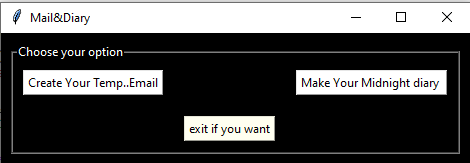

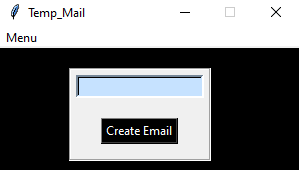

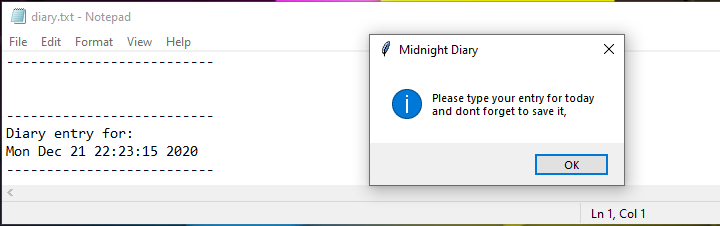